#### Regressão e correlação

A regressão é um método estatístico que tenta determinar a força e o comportamento da relação entre a variável dependente (normalmente chamade Y) e um conjunto de um ou mais variáveis (conhecido como variáveis independentes). O Método dos Mínimos Quadrados (em inglês, Ordinary Least Squares - OLS) é um método estatístico para analisar essa relação entre variáveis minimizando a soma dos quadrados das diferenças entre os valores observados e os as variáveis do modelo.

Se os dados mostrarem uma relação linear entre as variáveis X e Y, é útil encontrar a linha que melhor se adequa a essa relação, nos permitindo fazer predições e extrapolações. A regressão calculada pelo Método dos Mínimos Quadrados é a linha que torna a distância vertical dos pontos de dados à linha de regressão a menor possível. É chamado de "mínimos quadrados" porque minimiza a soma dos quadrados dos erros (conhecido como variância). Podemos também chamá-la somente de regressão linear. A variável R² mede o quão boa é a regressão ajustada aos dados que possui a forma:

$Y=\beta_1X+\beta_2+\epsilon$

onde $\beta_1$ é chamado de inclinação, $\beta_2$ de intercepto, $X$ a variável independente e $Y$ a variável dependente e $\epsilon$ é o erro, a parte que a regressão de $Y$ não consegue explicar.

As suposições para a regressão linear são:

- Linearidade: a relação entre X e Y é linear;
- Homoscedasticidade: a variância dos resíduos é a mesma para qualquer valor de X;
- Independência: todas as observações são independentes;
- Normalidade: Y é normalmente distribuído para qualquer valor de X.

Uma vez que o intercepto e a inclinação (ou declividade) forem estimadas, índies como o coeficiente de correlação pode ser calculado. 

A correlação quantifica a direção e a força da relação entre duas variáveis numéricas. Ela é medida pelo coeficiente de correlação que varia entre -1 e 1. Quando o valor do coeficiente de correlação é zero, indica que não há correlação linear. Quando a correlação se aproxima de -1 ou 1, a relação é mais forte. O valor de +1 indica uma relação linear positiva perfeira, enquanto que -1 uma relação linear negativa perfeita entre as duas variáveis.

O coeficiente de determinação, também chamado de R², é uma medida de ajuste de um modelo estatístico linear generalizado, como a regressão linear simples ou múltipla, aos valores observados de uma variável aleatória. O R² varia entre 0 e 1, por vezes sendo expresso em termos percentuais. Nesse caso, expressa a quantidade da variância dos dados que é explicada pelo modelo linear. Assim, quanto maior o R², mais explicativo é o modelo linear, ou seja, melhor ele se ajusta à amostra. Por exemplo, um R² = 0,8234 significa que o modelo linear explica 82,34% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear.

Podemos implementar a regressão linear no Python usando bibliotecas como o scipy, numpy e pandas. Os dados que utilizaremos dessa vez será o de Expectativa de Vida do [Kaggle](https://www.kaggle.com/kumarajarshi/life-expectancy-who?select=Life+Expectancy+Data.csv). Ele possui 22 colunas para Ano, País, Expectativa de Vida e fatores que podem afetar a expectativa de vida como influência do Alcool. Primeiramente iremos ler os dados e estudar a expectativa de vida do Brasil.

In [16]:
import pandas as pd

# Ler o conjunto de dados
df = pd.read_csv('Life_Expectancy_Data.csv')
df[df['Country'] == 'Brazil']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
352,Brazil,2015,Developing,75.0,142.0,42,NaN,0.000000,96.0,214,...,98.0,NaN,96.0,0.1,8757.262200,2596218.0,2.7,2.6,0.754,15.2
353,Brazil,2014,Developing,74.8,144.0,44,7.32,83.164654,96.0,876,...,96.0,8.32,93.0,0.1,1226.617310,24213133.0,2.7,2.7,0.747,15.2
354,Brazil,2013,Developing,74.7,146.0,46,7.24,916.270845,96.0,220,...,96.0,8.48,97.0,0.1,12216.944600,2248632.0,2.8,2.7,0.734,14.2
355,Brazil,2012,Developing,74.5,148.0,49,7.55,843.194626,96.0,2,...,96.0,8.26,95.0,0.1,12291.466850,256983.0,2.8,2.8,0.730,14.2
356,Brazil,2011,Developing,74.1,152.0,51,7.58,1084.999766,98.0,43,...,98.0,8.90,99.0,0.1,13167.472890,198686688.0,2.9,2.8,0.724,14.0
357,Brazil,2010,Developing,73.8,154.0,54,7.52,1111.191325,96.0,68,...,99.0,8.27,99.0,0.1,11224.154800,196796269.0,2.9,2.9,0.716,13.8
358,Brazil,2009,Developing,73.6,157.0,57,7.33,564.523390,99.0,0,...,99.0,8.65,99.0,0.1,8553.384700,194895996.0,3.0,2.9,0.714,13.8
359,Brazil,2008,Developing,73.4,158.0,61,7.21,526.378064,96.0,0,...,99.0,8.24,99.0,0.1,8787.613750,19297929.0,3.0,3.0,0.704,13.3
360,Brazil,2007,Developing,73.3,159.0,65,7.19,394.932130,99.0,0,...,99.0,8.28,99.0,0.1,7313.557962,19126637.0,3.1,3.0,0.700,13.5
361,Brazil,2006,Developing,73.0,161.0,70,7.10,30.303747,99.0,57,...,99.0,8.36,99.0,0.1,586.145975,18912412.0,3.1,3.1,0.698,13.8


#### Descrição das variáveis

- country (Nominal) - Nome do país de cada indicador
- year (Ordinal) - Ano de cada indicador (variando de 2000 a 2015)
- status (Nominal) - Se um país é desenvolvido ou está em desenvolvimento pela OMS
- life_expectancy (Taxa) - expectativa de vida das pessoas em anos
- adult_mortality (Taxa) - a taxa de mortalidade de adultos por 1000 habitantes
- infant_deaths (Taxa) - número de mortes de crianças por 1000 habitantes
- alcohol (Taxa) - taxa de consumo de álcool de um país medida em litros de consumo de álcool puro per capita
- percentage_expenditure (Taxa) - despesas com saúde em porcentagem do Produto Interno Bruto (PIB)
- hepatitis_b (Taxa) - número de crianças de 1 ano com imunização contra hepatite B por todas as crianças de 1 ano na população
- measles (Ratio) - número de casos de sarampo notificados por 1000 habitantes
- bmi (Intervalo/Ordinal) - Índice de massa corporal médio (IMC) da população total de um país
- under-five_deaths (Taxa) - Número de mortes de menores de cinco anos por 1000 habitantes
- polio (Taxa) - número de crianças de 1 ano com imunização contra poliomielite em relação ao número de todas as crianças de 1 ano na população
- total_expenditure (Taxa) - Despesas do governo com saúde em relação a despesas totais do governo
- diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
- hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
- gdp (Ratio) - Gross Domestic Product per capita
- population (Ratio) - population of a country
- thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)
- thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9
- income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- schooling (Ratio) - average number of years of schooling of a population

Escolha uma variável e analise graficamente criando:

1. Scatter plot
2. Box Plot
3. Histograma
4. Density Plot

#### Detectando valores faltantes

Algumas coisas que precisamos considerar ao tratar de valores faltantes:

Detecção de valores faltantes:

- Encontrar nulls
- O null pode ser mudado para outro valor? Zero talvez?

Lidando com os valores faltantes:
- É possível preencher os nulls? 
- Substituímos ou eliminamos esses valores?

Utilizaremos a função .info() do Pandas para encontrar os nulls

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Alguns valores faltantes podem não ser facilmente detectados apenas utilizando um .info(). Precisamos pensar: Quais valores poderiam ser nulls? Será que há algum valor preenchido de forma errada?

Utilizaremos o .describe() para olhar cada variável e, dada sua descrição, notar anormalidades nos dados dada. A análise dos dados foi retirado [deste notebook](https://www.kaggle.com/philbowman212/life-expectancy-exploratory-data-analysis) no Kaggle.

In [18]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [19]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Alguns pontos que podem não fazer sentido:

- Mortalidade de adultos de 1? Isso provavelmente é um erro de medição, mas que valor tem sentido? Talvez seja necessário alterá-lo para 1 a partir de um certo limiar.
- Morte de crianças de 0 a cada 1000? Esses valores provavelmente são nulls. Da mesma forma, 1800 também é um outlier que talvez não faça sentido, mas é possível que um país tenha uma taxa altíssima de nascimentos e não possua uma população grande. Depois olharemos com calma.
- IMC (BMI) de 1 e 87,3? Com certeza valores preenchidos incorretamente. Para referência, IMC de 15 é extramente abaixo do peso, enquanto que 40 é obeso. Valores fora deste intervalo não fazem sentido.
- Morte de menores de 5 anos, também difícil possuir valores iguais a zero.
- PIB per capta de 1,68 dólares é possível? Precisamos checar por outliers.
- População de 34 pessoas?

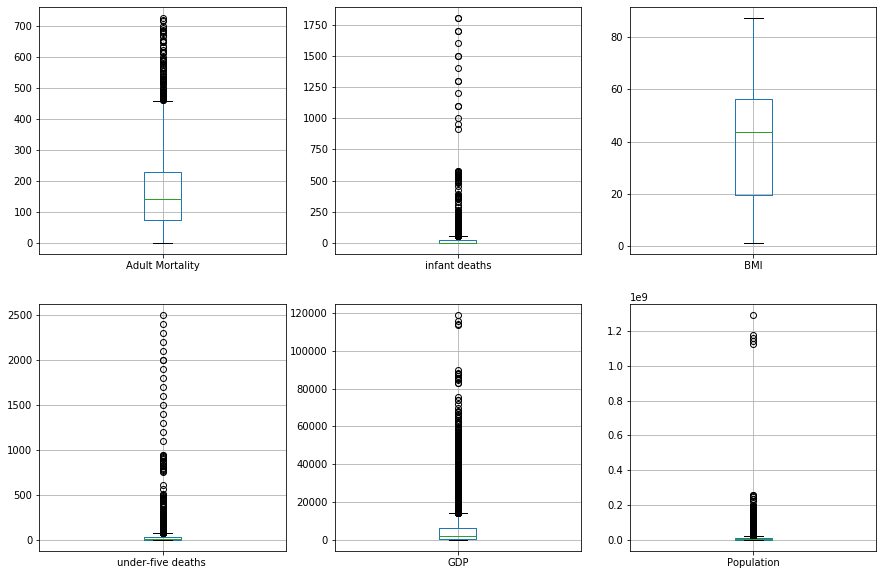

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
for i, col in enumerate(['Adult Mortality', 'infant deaths', ' BMI ', 'under-five deaths ', 'GDP', 'Population'], start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

Decidiremos por alterar valores para null nos seguintes casos:

- Valores de mortalidade adulta menores que o percentil 5
- Mortes de crianças de 0
- IMC menores que 10 e maiores que 50
- Morte de menores de 5 anos de 0

In [21]:
import numpy as np

mort_5_percentile = np.percentile(df['Adult Mortality'].dropna(), 5)
df['Adult Mortality'] = df.apply(lambda x: np.nan if x['Adult Mortality'] < mort_5_percentile else x['Adult Mortality'], axis=1)
df['infant deaths'] = df['infant deaths'].replace(0, np.nan)
df[' BMI '] = df.apply(lambda x: np.nan if (x[' BMI '] < 10 or x[' BMI '] > 50) else x[' BMI '], axis=1)
df['under-five deaths '] = df['under-five deaths '].replace(0, np.nan)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2783 non-null   float64
 5   infant deaths                    2090 non-null   float64
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             1482 non-null   float64
 11  under-five deaths                2153 non-null   float64
 12  Polio               

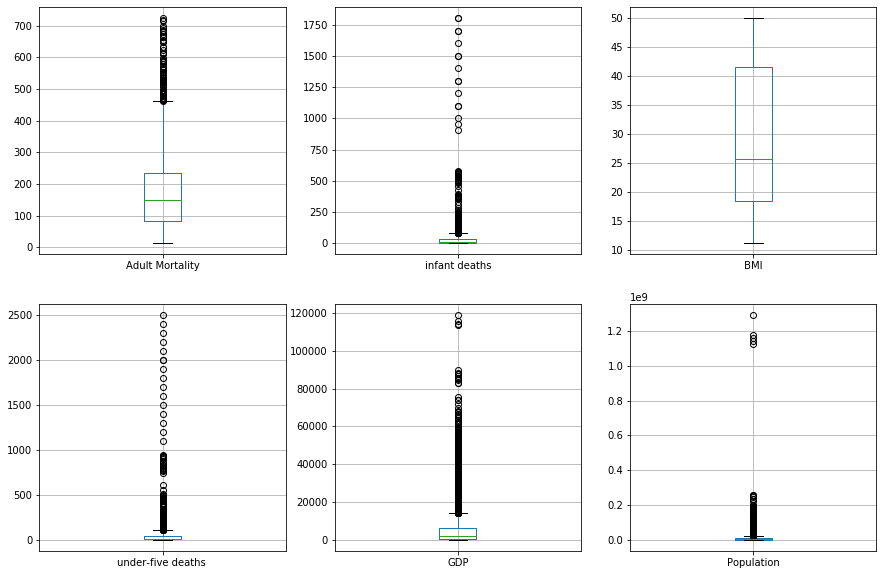

In [22]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['Adult Mortality', 'infant deaths', ' BMI ', 'under-five deaths ', 'GDP', 'Population'], start=1):
    plt.subplot(2, 3, i)
    df.boxplot(col)

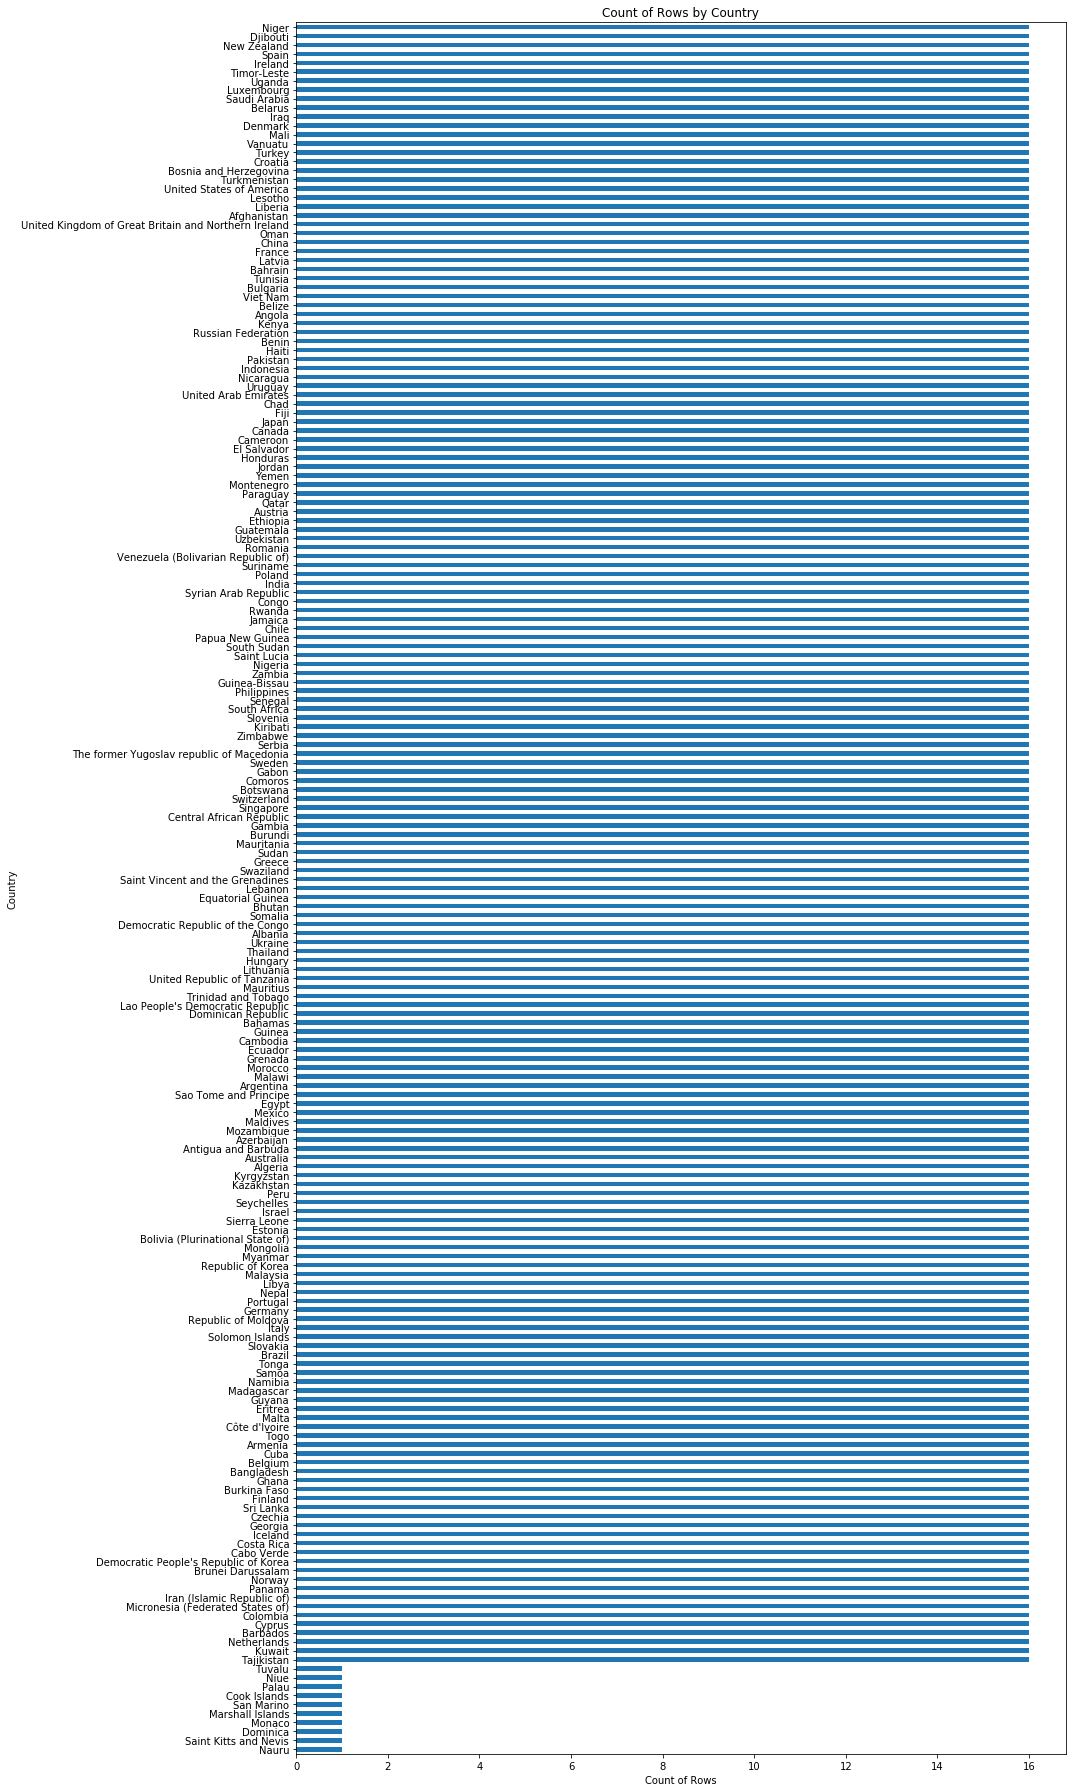

In [23]:
plt.figure(figsize=(15, 25))
temp_df = df.iloc[:, 0:3]
temp_df['Country'].value_counts(ascending=True).plot(kind='barh')
plt.title('Count of Rows by Country')
plt.xlabel('Count of Rows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

A maioria dos países possuem 16 linhas (16 anos) de dados. Quando analisarmos, alguns países podem ser mais bem representados que outros.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA8C5195C8>,
      dtype=object)

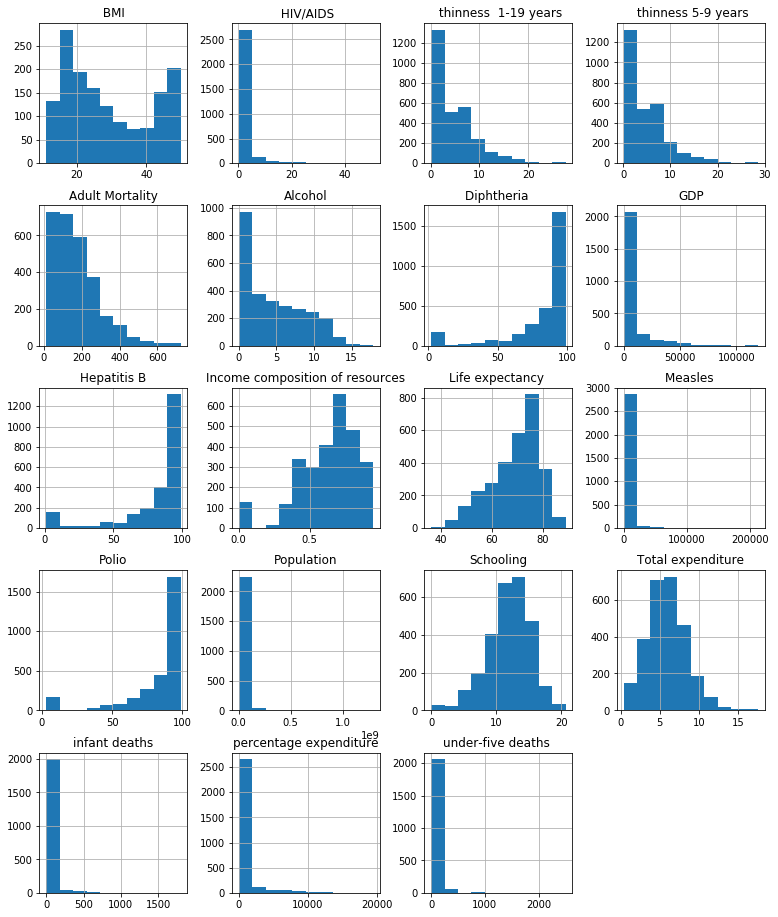

In [24]:
df.hist(column=list(df.columns)[2:], figsize=(13,16))

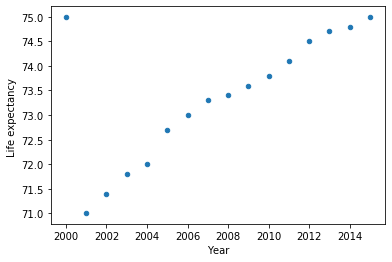

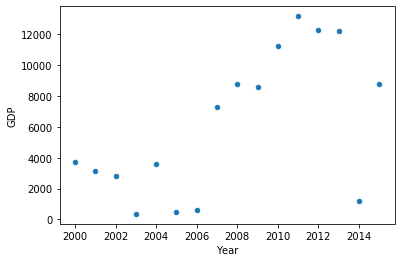

In [25]:
df_Brasil = df[df['Country'] == 'Brazil']

df_Brasil.plot.scatter(x='Year', y='Life expectancy ')
df_Brasil.plot.scatter(x='Year', y='GDP')
#plt.scatter(x=df['Bachelors degree'], y=df['Median Income'])

#plt.show(x='Year', y='')

#### Regressão

In [26]:
import scipy.stats as ss

x = df_Brasil['Year']
y = df_Brasil['Life expectancy ']

slope, intercept, r_value, p_value, std_err = ss.linregress(x,y)
print(slope)
print(intercept)
print(r_value)
print(p_value)

0.19426470588235276
-316.60514705882315
0.7079071092661802
0.002152784172124836


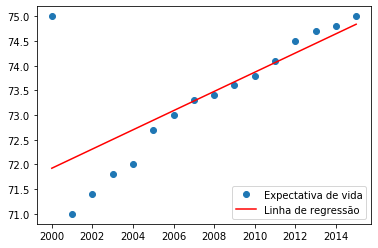

In [27]:
plt.plot(x, y, 'o', label='Expectativa de vida')
plt.plot(x, intercept + slope*x, 'r', label='Linha de regressão')
plt.legend()
plt.show()

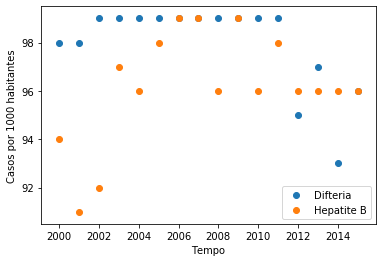

In [28]:
fig = plt.figure()
plt.scatter(x=list(df_Brasil['Year']),y=list(df_Brasil['Diphtheria ']), label='Difteria')
#plt.scatter(x=list(df_Brasil['Year']),y=list(df_Brasil['Measles ']), label='Sarampo')
plt.scatter(x=list(df_Brasil['Year']),y=list(df_Brasil['Hepatitis B']), label='Hepatite B')
plt.xlabel('Tempo')
plt.ylabel('Casos por 1000 habitantes')
plt.legend(loc="lower right")

#### Mais sobre correlação

Uma regra importante para lembrar é que Correlação não implica em causalidade!

Vejamos dois exemplos:

- O consumo de sorvete aumenta durante o verão. Ou seja, há uma correlação alta entre as vendas de sorvete e a chegada do verão. Neste exemplo em particular, temos uma relação de causalidade, uma vez que verões intensos aumentam a venda de sorvetes.

- Vendas de sorvetes também possuem uma alta correlação com ataques de Tubarão. Como você deve imaginar, o consumo de sorvetes não tem relação com os ataques. Neste caso, não há causalidade.

Em resumo, correlação __nem sempre__ implica em causalidade.

Como já vimos lá em cima, o coeficiente de correlação varia de -1 a 1, quanto mais próximo de 1 maior a correlação. 0 indica que não há correlação.

Existem dois principais coeficientes que analisam correlação:

Coeficiente de Correlação de Pearson: Ele avalia SOMENTE a relação LINEAR entre duas variáveis contínuas (uma relação linear acontece quando a mudança de uma variável está associada proporcionalmente a mudança de outra variável). Por exemplo, idade x pressão arterial.

Coeficiente de Correlação de Spearman: Avalia a relação [MONOTÔNICA](https://en.wikipedia.org/wiki/Monotonic_function) entre duas variáveis (contínuas ou ordinais) e é baseado nos valores classificados (ranqueados) para cada variável em vez dos dados brutos. Uma relação monotônica indica que: 1) a medida que um valor aumenta, o outro também aumenta; OU 2) a medida que um valor aumenta, o outro diminui.

Veja que a diferença é que a taxa de crescimento ou decrescimento não precisa ser constante como na relação linear.

Observe também para o uso do [Kendall Tau](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.kendalltau.html)

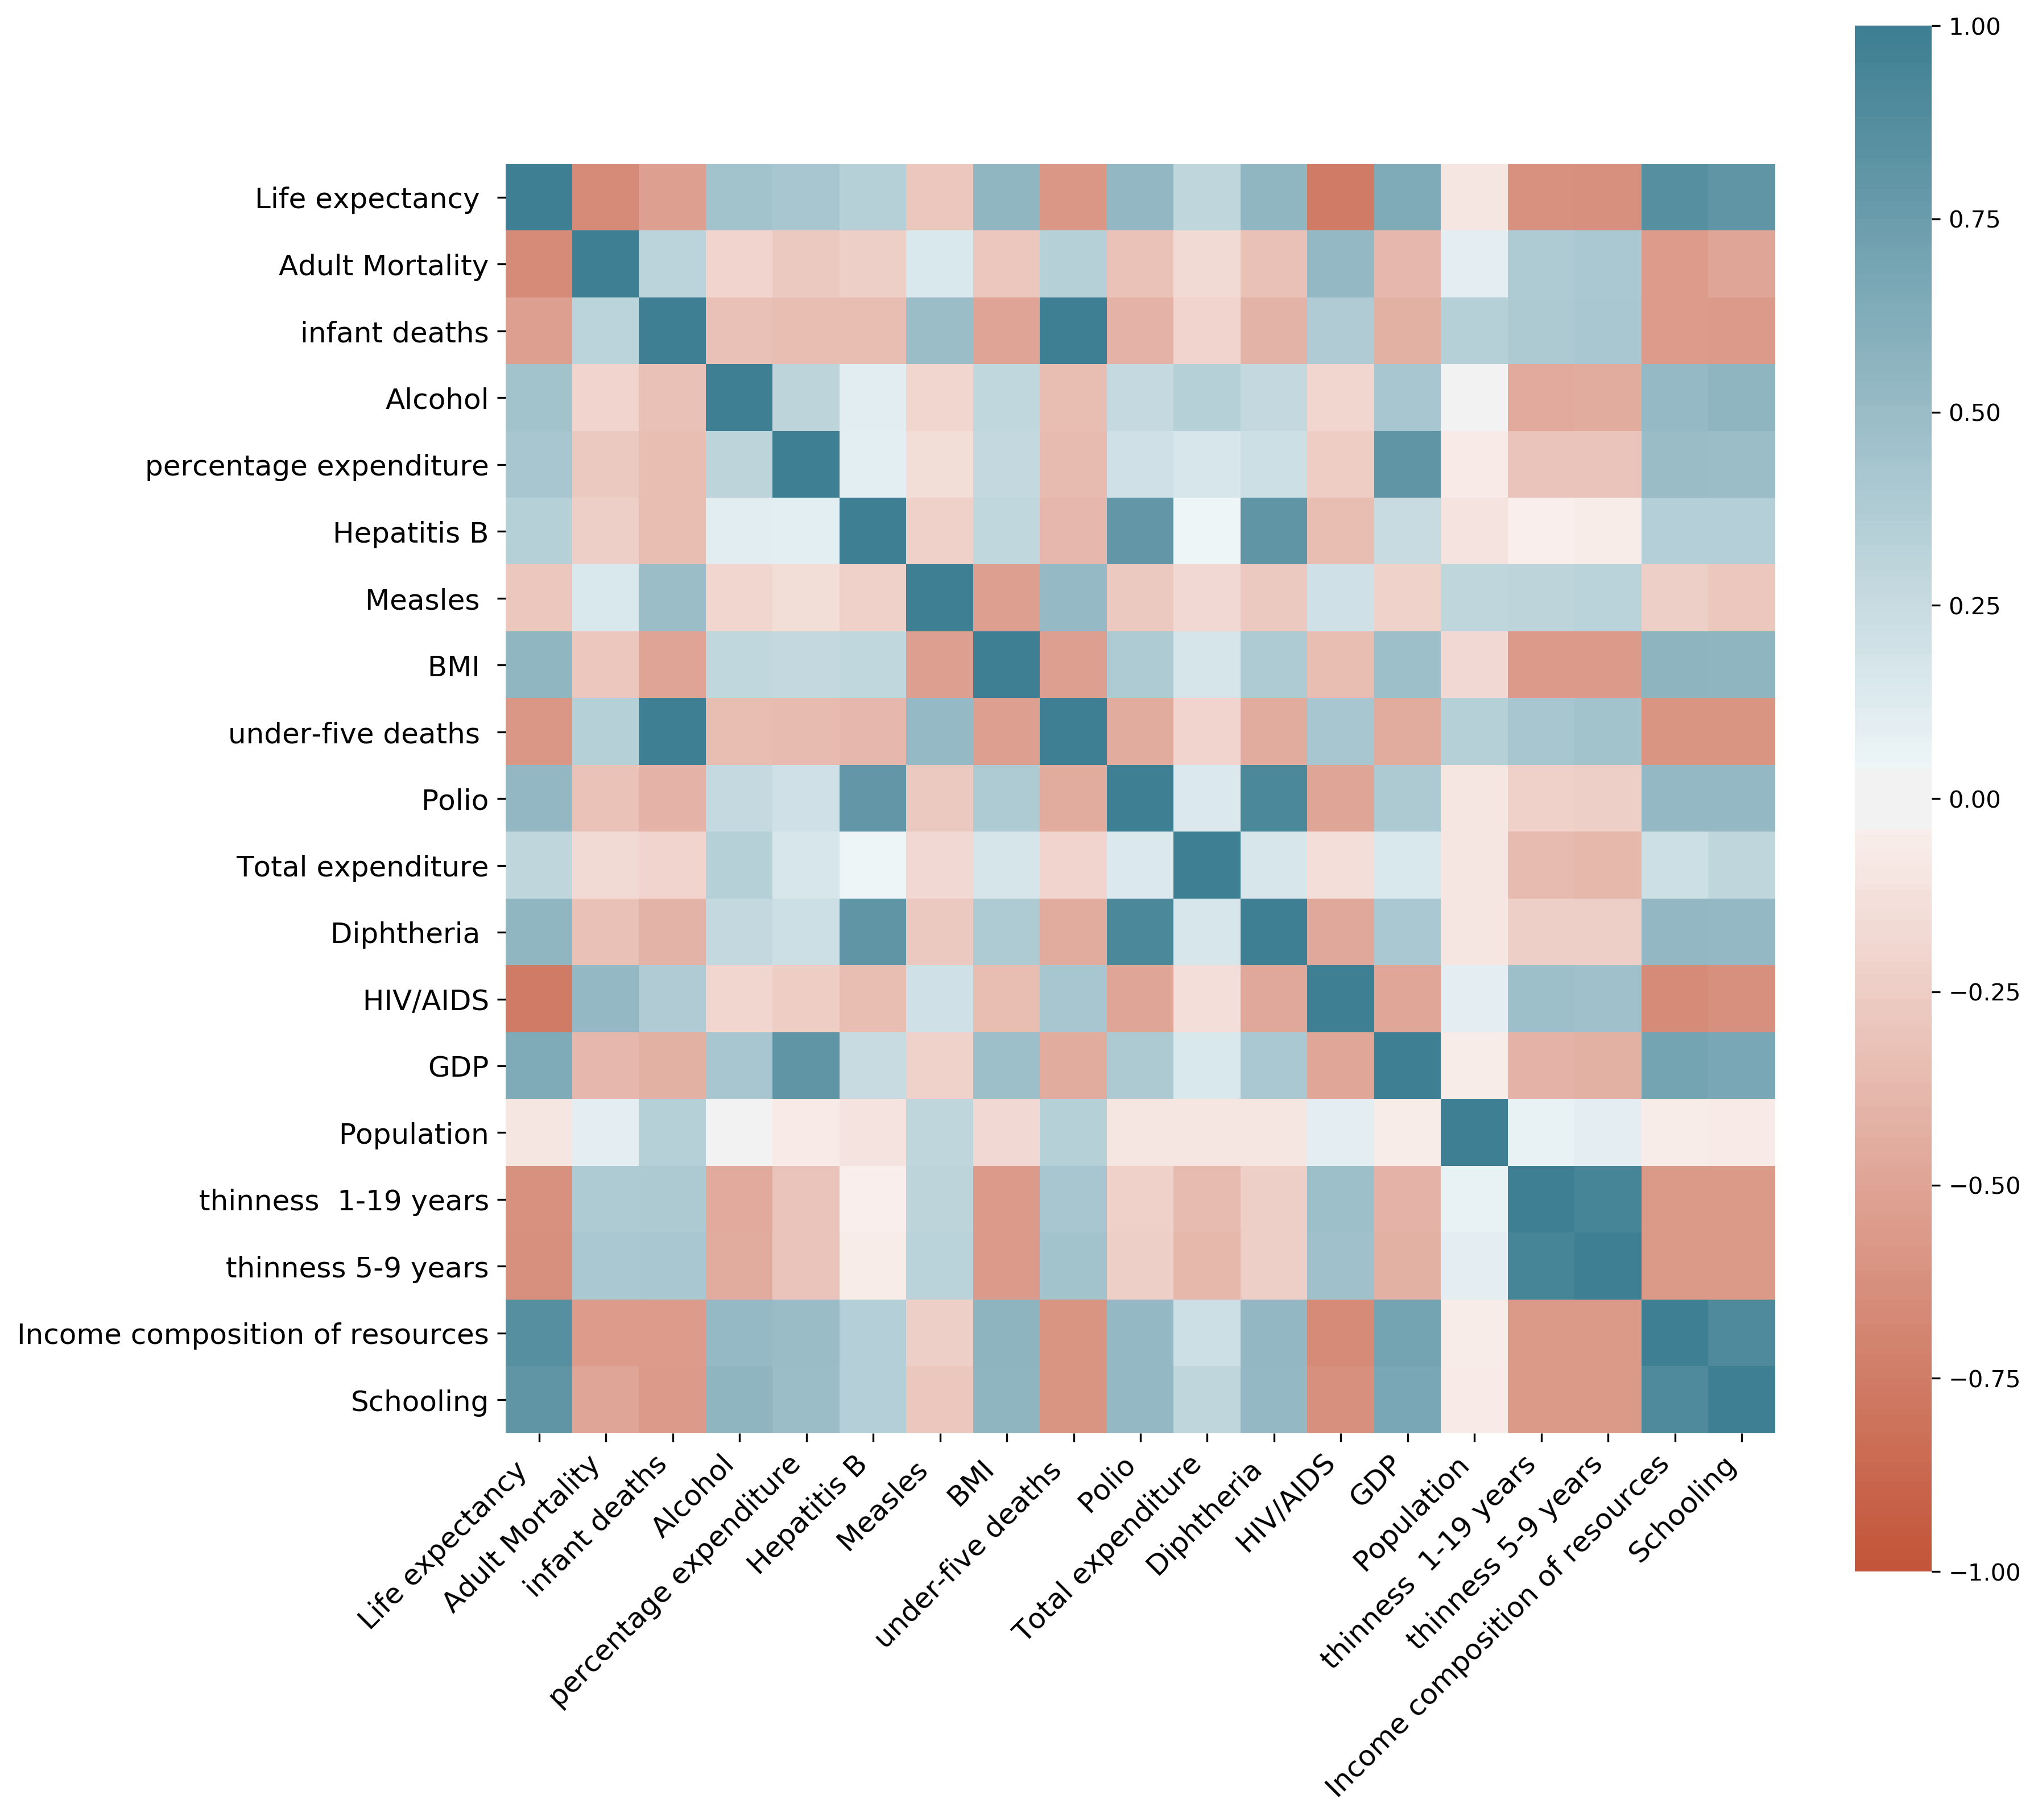

In [29]:
import seaborn as sns

def correlation_matrix(data):
    corr = data.corr(method='spearman')
    plt.figure(num=None, figsize=(12, 12), dpi=300, facecolor='w', edgecolor='k')
    ax = sns.heatmap(corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        fontsize=12,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        fontsize=12,
    )
    return

used_cols=list(df.columns)[3:]
correlation_matrix(df[used_cols])